# Data preparation

In [1]:
import numpy as np
import pandas as pd
import cv2
import Finger_functions as f #we import our previously defined functions
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [2]:
fingerprint_df = f.create_fingerprint_dataframe()
df = fingerprint_df

In [3]:
fingerprint_df

,file_path,id,modification,gender,hand,finger,method
0,./SOCOFing/Real/1__M_Right_middle_finger.BMP,1,real,Male,Right,middle,None
1,./SOCOFing/Real/1__M_Right_thumb_finger.BMP,1,real,Male,Right,thumb,None
2,./SOCOFing/Real/1__M_Right_ring_finger.BMP,1,real,Male,Right,ring,None
3,./SOCOFing/Real/1__M_Left_little_finger.BMP,1,real,Male,Left,little,None
4,./SOCOFing/Real/1__M_Left_index_finger.BMP,1,real,Male,Left,index,None
...,...,...,...,...,...,...,...
55265,./SOCOFing/Altered/Altered-Hard/600__M_Left_in...,600,hard,Male,Left,index,Obl
55266,./SOCOFing/Altered/Altered-Hard/600__M_Right_t...,600,hard,Male,Right,thumb,Zcut
55267,./SOCOFing/Altered/Altered-Hard/600__M_Right_m...,600,hard,Male,Right,middle,CR
55268,./SOCOFing/Altered/Altered-Hard/600__M_Right_t...,600,hard,Male,Right,thumb,Obl


In [4]:
rows, columns = fingerprint_df.shape
print(f"The DataFrame has {rows} rows and {columns} columns.")


The DataFrame has 55270 rows and 7 columns.


In [5]:
import os

paths = [f.path_real, f.path_altered_easily, f.path_altered_medium, f.path_altered_hard]

total_files = 0
for path in paths:
    num_files = len(os.listdir(path))
    total_files += num_files
    print(f"Number of files in {path}: {num_files}")

print(f"Total number of files: {total_files}")


Number of files in ./SOCOFing/Real/: 6000
Number of files in ./SOCOFing/Altered/Altered-Easy/: 17931
Number of files in ./SOCOFing/Altered/Altered-Medium/: 17067
Number of files in ./SOCOFing/Altered/Altered-Hard/: 14272
Total number of files: 55270


So it really does have 55270 rows, so all of our data is loaded

In [6]:
fingerprint_df['modification'] = fingerprint_df['modification'].map({'real': 0,'easily': 1, 'medium': 2 ,'hard': 3})
fingerprint_df['gender'] = fingerprint_df['gender'].map({'Male': 0, 'Female': 1})
fingerprint_df['hand'] = fingerprint_df['hand'].map({'Right': 0, 'Left': 1})
fingerprint_df['finger'] = fingerprint_df['finger'].map({'thumb': 0, 'index': 1, 'middle': 2, 'ring': 3,'little': 4})
fingerprint_df['method'] = fingerprint_df['method'].map({None: 0, 'CR': 1, 'Obl': 2, 'Zcut': 3}) 
df_data = fingerprint_df

In [7]:
fingerprint_df

,file_path,id,modification,gender,hand,finger,method
0,./SOCOFing/Real/1__M_Right_middle_finger.BMP,1,0,0,0,2,0
1,./SOCOFing/Real/1__M_Right_thumb_finger.BMP,1,0,0,0,0,0
2,./SOCOFing/Real/1__M_Right_ring_finger.BMP,1,0,0,0,3,0
3,./SOCOFing/Real/1__M_Left_little_finger.BMP,1,0,0,1,4,0
4,./SOCOFing/Real/1__M_Left_index_finger.BMP,1,0,0,1,1,0
...,...,...,...,...,...,...,...
55265,./SOCOFing/Altered/Altered-Hard/600__M_Left_in...,600,3,0,1,1,2
55266,./SOCOFing/Altered/Altered-Hard/600__M_Right_t...,600,3,0,0,0,3
55267,./SOCOFing/Altered/Altered-Hard/600__M_Right_m...,600,3,0,0,2,1
55268,./SOCOFing/Altered/Altered-Hard/600__M_Right_t...,600,3,0,0,0,2


In [8]:
fingerprint_df['id'].values

array(['1', '1', '1', ..., '600', '600', '600'], dtype=object)

In [9]:
fingerprint_df['image_data'] = fingerprint_df['file_path'].apply(f.load_image)
fingerprint_df

,file_path,id,modification,gender,hand,finger,method,image_data
0,./SOCOFing/Real/1__M_Right_middle_finger.BMP,1,0,0,0,2,0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
1,./SOCOFing/Real/1__M_Right_thumb_finger.BMP,1,0,0,0,0,0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
2,./SOCOFing/Real/1__M_Right_ring_finger.BMP,1,0,0,0,3,0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
3,./SOCOFing/Real/1__M_Left_little_finger.BMP,1,0,0,1,4,0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
4,./SOCOFing/Real/1__M_Left_index_finger.BMP,1,0,0,1,1,0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
...,...,...,...,...,...,...,...,...
55265,./SOCOFing/Altered/Altered-Hard/600__M_Left_in...,600,3,0,1,1,2,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
55266,./SOCOFing/Altered/Altered-Hard/600__M_Right_t...,600,3,0,0,0,3,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
55267,./SOCOFing/Altered/Altered-Hard/600__M_Right_m...,600,3,0,0,2,1,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
55268,./SOCOFing/Altered/Altered-Hard/600__M_Right_t...,600,3,0,0,0,2,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."


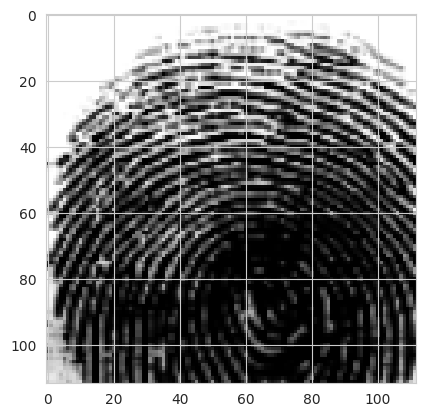

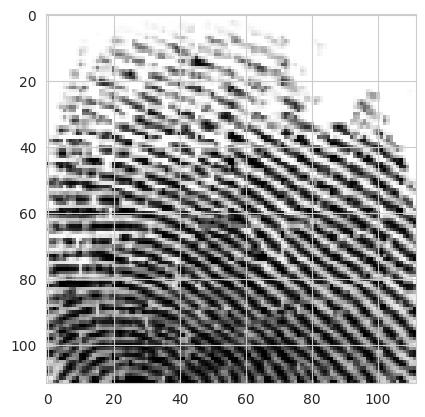

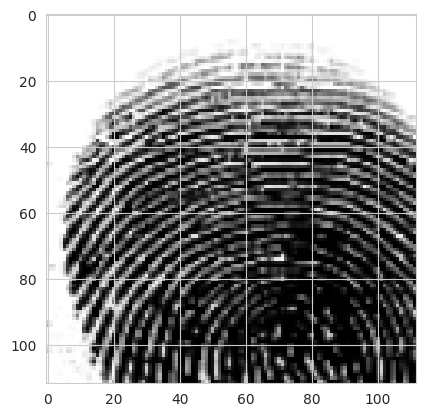

In [10]:
#Check if it is loaded well (cannot see the whole matrix in the dataframe)
for i in range(3):
    img = fingerprint_df['image_data'].iloc[i]
    plt.imshow(img, cmap='gray')
    plt.show()

So as can be seen we have loaded our data and now we can use fingerprint_df that contains all the necessary data

# Understanding the data

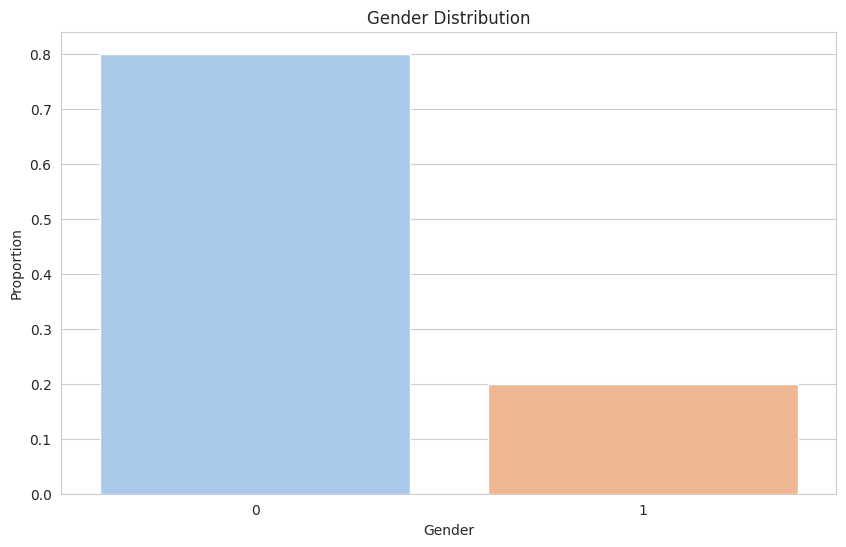

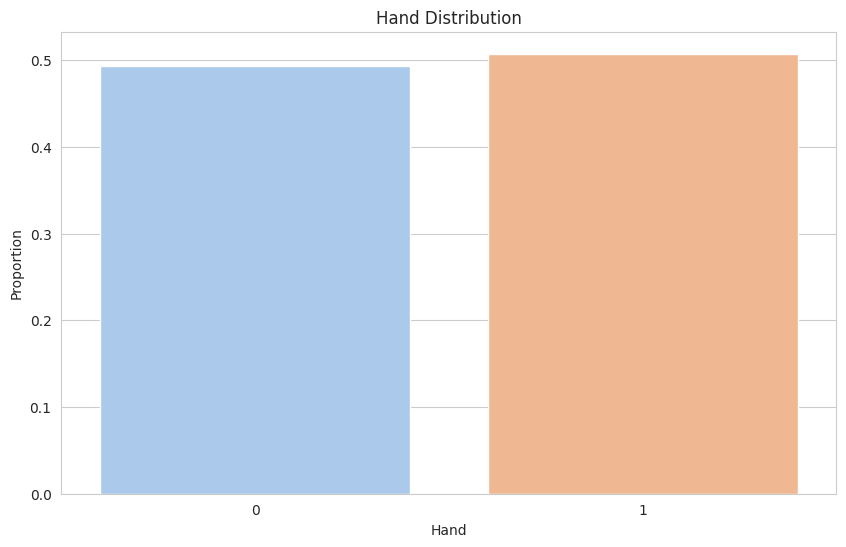

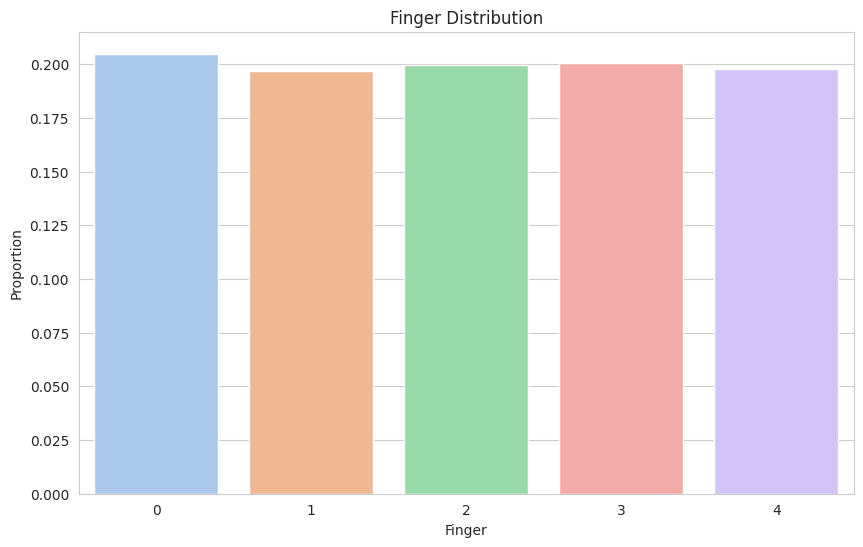

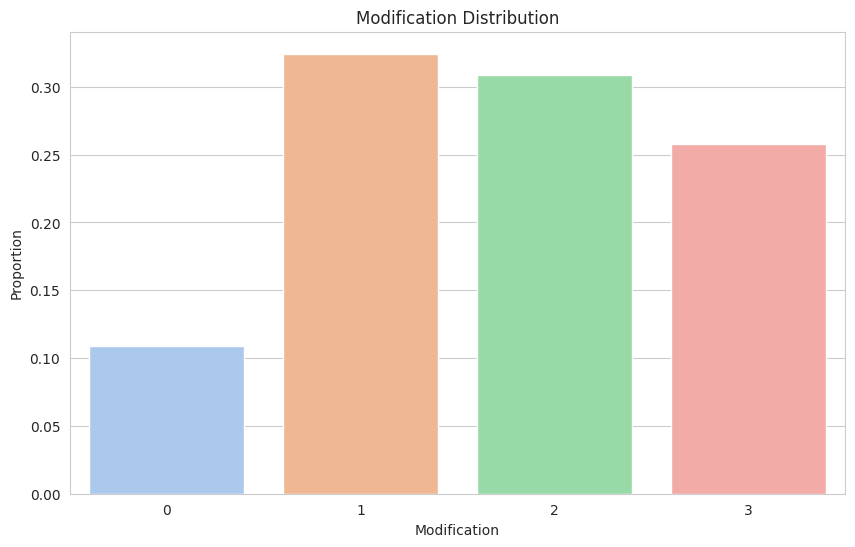

In [11]:
import warnings
def plot_dataframe(data, column, title, xlabel_rotation=0):
    normalized_counts = data[column].value_counts(normalize=True)
    warnings.filterwarnings("ignore")
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x=normalized_counts.index, 
        y=normalized_counts.values,
        palette=sns.color_palette("pastel")
    )
    plt.title(title)
    plt.ylabel('Proportion')
    plt.xlabel(column.capitalize())
    plt.show()

plot_dataframe(df, "gender", title="Gender Distribution")
plot_dataframe(df, "hand", title="Hand Distribution")
plot_dataframe(df, "finger", title="Finger Distribution")
plot_dataframe(df, "modification", title="Modification Distribution")

# Synthetically modify the fingerprint to get more training data

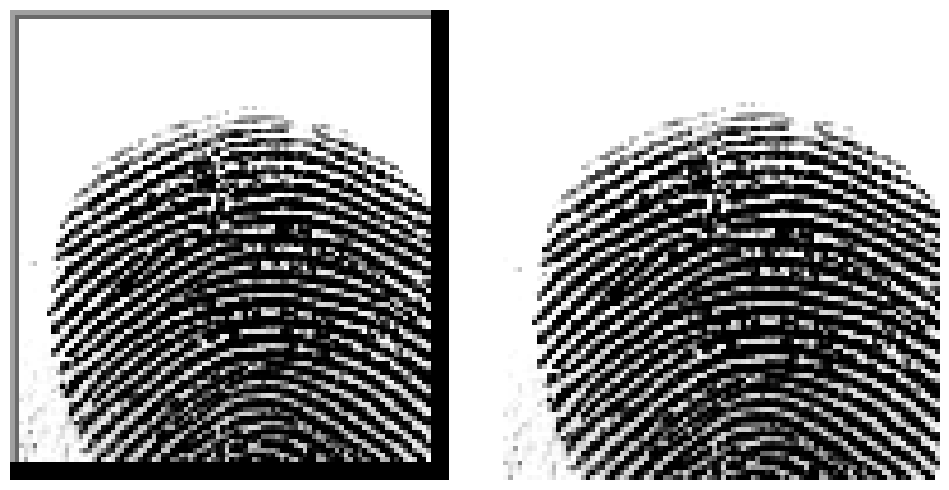

In [12]:
def remove_frame(image_path):
    image = cv2.imread(image_path)

    x = 2
    y = 2
    w = 90
    h = 97
    x_end = min(x + w, 112)
    y_end = min(y + h, 112)
    cropped_image = image[y:y_end, x:x_end]
    
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    
image_path = fingerprint_df['file_path'].iloc[100]
remove_frame(image_path)


## Check if the rotation is working correctly

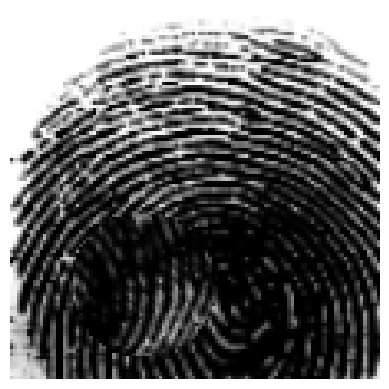

In [13]:
image_array = fingerprint_df['image_data'].iloc[0]
modified_image = f.rotate_circle_region(image_array)

plt.imshow(modified_image, cmap='gray')
plt.axis('off')
plt.show()

## Generate new modified images by central rotation

In [14]:
cr_df = f.generate_modified_fingerprint_dataframe_rotation(fingerprint_df, 'image_data')
cr_df

,file_path,id,modification,gender,hand,finger,method,image_data
0,,1,4,0,0,2,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
1,,1,4,0,0,0,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
2,,1,4,0,0,3,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
3,,1,4,0,1,4,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
4,,1,4,0,1,1,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
...,...,...,...,...,...,...,...,...
5995,,600,4,0,1,0,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
5996,,600,4,0,1,2,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
5997,,600,4,0,0,1,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
5998,,600,4,0,1,1,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."


In [15]:
rows, columns = cr_df.shape
rows, columns

(6000, 8)

In [16]:
cr_df['id'].values

array(['1', '1', '1', ..., '600', '600', '600'], dtype=object)

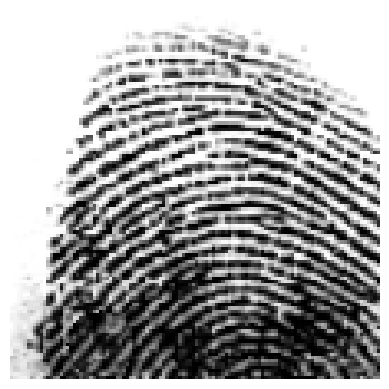

In [17]:
image_array = cr_df['image_data'].iloc[55]
plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()

## Using obliteration

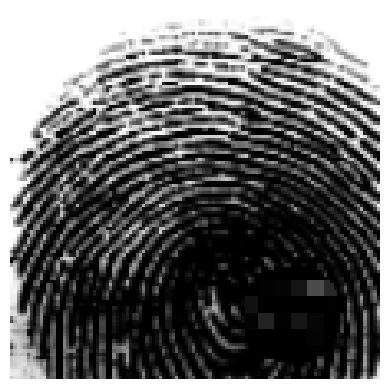

In [18]:
image_array = fingerprint_df['image_data'].iloc[0]
modified_image = f.obliterate_circle_region_with_noise(image_array)

plt.imshow(modified_image,cmap='gray')
plt.axis('off')
plt.show()

In [19]:
blurred_df = f.generate_modified_fingerprint_dataframe_obl(fingerprint_df, "image_data")
blurred_df

,file_path,id,modification,gender,hand,finger,method,image_data
0,,1,4,0,0,2,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
1,,1,4,0,0,0,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
2,,1,4,0,0,3,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
3,,1,4,0,1,4,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
4,,1,4,0,1,1,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
...,...,...,...,...,...,...,...,...
5995,,600,4,0,1,0,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
5996,,600,4,0,1,2,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
5997,,600,4,0,0,1,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
5998,,600,4,0,1,1,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."


In [20]:
rows, columns = blurred_df.shape
rows, columns

(6000, 8)

In [21]:
blurred_df['id'].values

array(['1', '1', '1', ..., '600', '600', '600'], dtype=object)

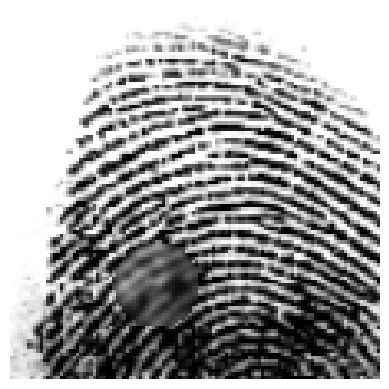

In [22]:
image_array = blurred_df['image_data'].iloc[55]
plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()

## Elastic

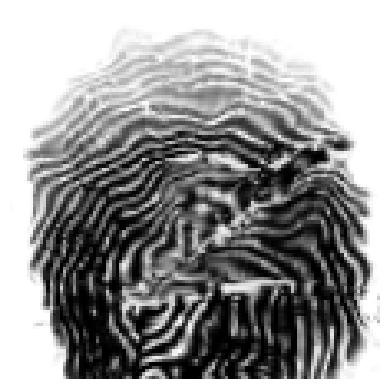

In [23]:
image_array = fingerprint_df['image_data'].iloc[55]
distorted_fingerprint = f.elastic_distortion(image_array, alpha=34, sigma=4)
plt.imshow(distorted_fingerprint, cmap='gray')
plt.axis('off')
plt.show()

In [24]:
elastic_df = f.generate_modified_fingerprint_dataframe_elastic(fingerprint_df, "image_data")
elastic_df

,file_path,id,modification,gender,hand,finger,method,image_data
0,,1,4,0,0,2,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
1,,1,4,0,0,0,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
2,,1,4,0,0,3,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
3,,1,4,0,1,4,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
4,,1,4,0,1,1,4,"[[0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0,..."
...,...,...,...,...,...,...,...,...
5995,,600,4,0,1,0,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
5996,,600,4,0,1,2,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
5997,,600,4,0,0,1,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
5998,,600,4,0,1,1,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."


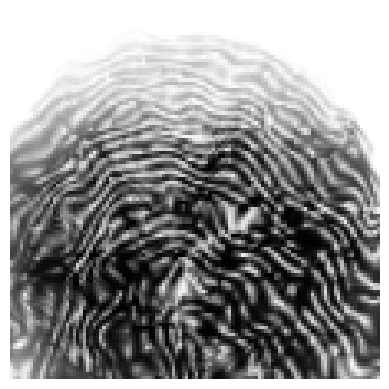

In [25]:
image_array = elastic_df['image_data'].iloc[543]
plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()

In [26]:
rows, columns = elastic_df.shape
rows , columns

(6000, 8)

In [27]:
elastic_df['id'].values

array(['1', '1', '1', ..., '600', '600', '600'], dtype=object)

# Merge the generated dataframes with the original fingerprint_df

In [31]:
merged_df = pd.concat([fingerprint_df, cr_df, blurred_df, elastic_df], ignore_index=True)

In [32]:
merged_df

,file_path,id,modification,gender,hand,finger,method,image_data
0,./SOCOFing/Real/1__M_Right_middle_finger.BMP,1,0,0,0,2,0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
1,./SOCOFing/Real/1__M_Right_thumb_finger.BMP,1,0,0,0,0,0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
2,./SOCOFing/Real/1__M_Right_ring_finger.BMP,1,0,0,0,3,0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
3,./SOCOFing/Real/1__M_Left_little_finger.BMP,1,0,0,1,4,0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
4,./SOCOFing/Real/1__M_Left_index_finger.BMP,1,0,0,1,1,0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
...,...,...,...,...,...,...,...,...
73265,,600,4,0,1,0,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
73266,,600,4,0,1,2,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
73267,,600,4,0,0,1,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
73268,,600,4,0,1,1,4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."


In [37]:
kep1 = merged_df['image_data'][0]

In [41]:
kep2 = np.stack((kep1, kep1,kep1),axis = 0 )

In [42]:
kep2.shape

(3, 112, 112)

In [44]:
#merged_df.to_csv('./updated_dataframe.csv', index=False)